<a href="https://colab.research.google.com/github/zawuya/Dlab-Project/blob/master/telecom_sentiment_analysis_unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis



####Install Packages

In [121]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Import important libraries**

In [122]:
#Important libraries

# For measuring classification performance
from sklearn.metrics import accuracy_score, f1_score 

# For plotting bar graphs and charts.
import seaborn as sns

 # Manipulation of big data sets
import pandas as pd

# For  multidimensional array object mathematical, logical, shape manipulation
import numpy as np 

# Regular expression operations
import re

#OS for file operations
import os

# # Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

# Models
#Multinomial classifier
from sklearn.naive_bayes import MultinomialNB

#Support Vector Machine Classifier
from sklearn.svm import SVC

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#KNearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier

#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#XGB Classifier
from xgboost import XGBClassifier

#Light GBM Classifier
from lightgbm import LGBMClassifier

#CatBoost Classifier
from catboost import CatBoostClassifier

# saving models
import joblib 

#counting data
from collections import Counter 
#import collections

#Sampling data
import imblearn

# over sampling library
from imblearn.over_sampling import RandomOverSampler

# Efficiency matrics
from sklearn.metrics import confusion_matrix

#Plotting graphs
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# text transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Packaging classification steps
from sklearn.pipeline import Pipeline

# Creating numerical data from categorical data
from sklearn.preprocessing import LabelEncoder

In [123]:
#Suppressing the warding messeges
warnings.filterwarnings("ignore")

###**Load Datasets**

In [124]:
#load dataset from a file
telecom_data=pd.read_csv("telecom_TZ_sentiment_data.csv", dtype=str)

In [125]:
#Check the dataset contents five rows at the top 
telecom_data.head()

,date,comment,platform,sentiment
0,2021-10-23 14:36:34+00:00,Chezea songesha wew https://t.co/FfnSsIkZGU,Twitter,1
1,2021-09-28 15:37:16+00:00,Tafuta hela sana ili usilalamikie mabadiliko y...,Twitter,1
2,2022-09-18 13:37:06+00:00,Hivi huu mtandao wa Tigo una tatizo au simu ya...,Twitter,-1
3,2021-04-08 18:34:13+00:00,@DaktariWaWatoto Tamtam bando ni ðŸ”¥ ila kuin...,Twitter,1
4,2022-09-24 05:03:32+00:00,@VodacomTanzania @ImranHussein84 Tatizo kifuru...,Twitter,-1


##*Feature Engineering*

### 1.0 **Exploratory Data Analysis**

In [126]:
#Displaying dataset structure and values 
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       8789 non-null   object
 1   comment    8789 non-null   object
 2   platform   8788 non-null   object
 3   sentiment  8782 non-null   object
dtypes: object(4)
memory usage: 274.8+ KB


In [127]:
#check if there are any duplicates in the dataset in summary
telecom_data.duplicated().sum()

11

In [128]:
# Observe the statistics variables in the dataset given
telecom_data.describe()

,date,comment,platform,sentiment
count,8789,8789,8788,8782
unique,8578,8775,3,4
top,2022-01-07 16:34:48+00:00,@airtel_tanzania nawapenda sana huduma hii ya ...,Twitter,-1
freq,2,2,8786,4649


In [129]:
#check for any null values available in the dataset
telecom_data.isna().sum()

date         1
comment      1
platform     2
sentiment    8
dtype: int64

In [130]:
#check for dataset datatypes
telecom_data.dtypes

date         object
comment      object
platform     object
sentiment    object
dtype: object

In [131]:
#checking the sentiment values count and see if there are any irrevant data in the dataset
telecom_data['sentiment'].value_counts()

-1           4649
0            3567
1             565
complains       1
Name: sentiment, dtype: int64

In [132]:
#searching for complains as sentiment datavalue which is irrevant in this case
telecom_data.loc[telecom_data['sentiment'] == 'complains']

,date,comment,platform,sentiment
1698,Twitter,0,network,complains


In [133]:
#removing the irrevant data values found in index id 1698
telecom_data = telecom_data.drop(index=1698, axis=1).reset_index(drop=True)

In [134]:
#check if irrevant datavalue is cleared
telecom_data['sentiment'].value_counts()

-1    4649
0     3567
1      565
Name: sentiment, dtype: int64

In [135]:
#check for any duplicated vaklues in the dataset
telecom_data.duplicated().sum()

11

# 3. Data Processing

## 3.1 Remove duplicate

In [136]:
#removing the duplicates data values in a dataset
telecom_data.drop_duplicates(subset=['comment'], keep='first', inplace=True)

## 3.2 Remove null values

In [137]:
#Removing the null values in a dataset focusing sentiment and comments
telecom_data.dropna(subset=['sentiment', 'comment'], inplace=True)

## check the dataset status

In [138]:
#verify if the duplicated values ate cleared
telecom_data.duplicated().sum()

0

In [139]:
#verify if nullvalues are cleared
telecom_data.isna().sum()

date         0
comment      0
platform     0
sentiment    0
dtype: int64

In [140]:
#Counting the dataset values for each column
telecom_data.count()

date         8767
comment      8767
platform     8767
sentiment    8767
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

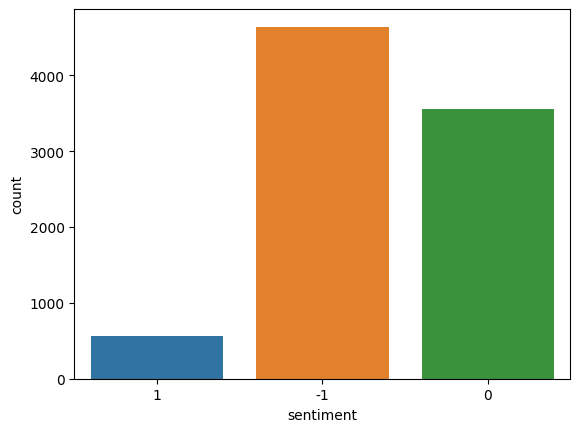

In [141]:
#Visualizing sentiment distributions
sns.countplot(x="sentiment", data=telecom_data)

In [142]:
#Displaying dataset structure 
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8767 entries, 0 to 8788
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       8767 non-null   object
 1   comment    8767 non-null   object
 2   platform   8767 non-null   object
 3   sentiment  8767 non-null   object
dtypes: object(4)
memory usage: 342.5+ KB


# 3.3 Cleaning

In [143]:
# This is a swahili dataset list
swahili_stopwords = [
    'akasema', 'alikuwa', 'alisema', 'baada', 'basi', 'bila', 'cha', 'chini',
    'hadi', 'hapo', 'hata', 'hivyo', 'hiyo', 'huku', 'huo', 'ila', 'ili',
    'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila', 'kima', 'kisha',
    'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la',
    'lakini', 'mara', 'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda',
    'mwenye', 'na', 'naye', 'ndani', 'ni', 'nini', 'nonkungu', 'pamoja', 'pia',
    'sana', 'sasa', 'sauti', 'tafadhali', 'tena', 'tu', 'vile', 'wa', 'wakati',
    'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'hivi', 'huu',
    'hii', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'vya', 'za', 't', 'co',
    'tz', 'au', 'tanzania', 'zaidi', 'zake', 'si','mm','ndo','hapa','je','hawa','nyie'
]


In [144]:
#Function to clean dataset for various observations
def clean_data_set(list_text):
    new_list = []
    for x in list_text:
        x = re.sub(r'@[\w]+','', str(x)) # remove twitter handle
        x = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)) # removes Url
        x = re.sub(r'[^\w\s]',' ', str(x))    # Remove Panctuations /?!. 
        x = x.strip()                   # Remove leading and trailing spaces
        x = re.sub(' +', ' ', x)        # Remove extra white spaces
        x = re.sub('[^A-Za-z0-9]+', ' ', x)  # Remove special characters
        x = x.lower()                   # Converts to lower case
        x = ' '.join([word for word in x.split() if word not in swahili_stopwords]) # Removes stopwords
        new_list.append(x)
    return new_list

In [145]:
# write the clean comment to a dataframe list
telecom_data["clean_comment"] = clean_data_set(telecom_data.comment.to_list())

In [146]:
#displaying the original comment and the clean comment side by side
telecom_data[['comment', 'clean_comment']]

,comment,clean_comment
0,Chezea songesha wew https://t.co/FfnSsIkZGU,chezea songesha wew
1,Tafuta hela sana ili usilalamikie mabadiliko y...,tafuta hela usilalamikie mabadiliko vifurushi ...
2,Hivi huu mtandao wa Tigo una tatizo au simu ya...,mtandao tigo una tatizo simu siku tatu leo mam...
3,@DaktariWaWatoto Tamtam bando ni ðŸ”¥ ila kuin...,tamtam bando kuinunulia mpk tpesa
4,@VodacomTanzania @ImranHussein84 Tatizo kifuru...,tatizo kifurushi internet nw akikai awali una ...
...,...,...
8784,@LuisaUhuru Unastream kutumia mtandao gani\nÃ°...,unastream kutumia mtandao gani
8785,Sasa mnasema mmebadilisha vifurushi naomba mni...,mnasema mmebadilisha vifurushi naomba mnitajie...
8786,@George_Ambangil @Tigo_TZ Sasa kama ad ww unal...,ad ww unalalamika vo nan niendelee kutumia mta...
8787,@mafolebaraka @Haloteltz Bora wewe mi nikitumi...,bora wewe mi nikitumiwa pesa halopesa haiingii...


In [147]:
#Saving the clean dataset to a file
telecom_data.to_csv("clean_telecom_data.csv", index=False)

# 4 Modeling

In [148]:
#Reading clean dataset 
clean_telecom_data = pd.read_csv("clean_telecom_data.csv")

In [149]:
#This is a procedure to check path and create a folder to store model
path = 'models'
isExisting = os.path.exists(path)
if not isExisting:
  os.mkdir(path)

In [150]:
#displaying the clean comment and sentiment data values
telecom_data[["clean_comment", 'sentiment']]

,clean_comment,sentiment
0,chezea songesha wew,1
1,tafuta hela usilalamikie mabadiliko vifurushi ...,1
2,mtandao tigo una tatizo simu siku tatu leo mam...,-1
3,tamtam bando kuinunulia mpk tpesa,1
4,tatizo kifurushi internet nw akikai awali una ...,-1
...,...,...
8784,unastream kutumia mtandao gani,0
8785,mnasema mmebadilisha vifurushi naomba mnitajie...,-1
8786,ad ww unalalamika vo nan niendelee kutumia mta...,-1
8787,bora wewe mi nikitumiwa pesa halopesa haiingii...,-1


In [151]:
#labels = map(lambda x: dict(enumerate(data['target_names']))[x], data['target'])
labels = map(lambda x: dict(enumerate(telecom_data['sentiment']))[x], telecom_data['sentiment'])

In [152]:
#Assigning dataset to x and y values
x = telecom_data.drop('sentiment', axis='columns')
y = telecom_data['sentiment']

In [153]:
# Split datasate into training and test chunks with a ratio of 8:0 respective
X_train, X_test, y_train, y_test = train_test_split(clean_telecom_data["clean_comment"], clean_telecom_data["sentiment"], test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [154]:
#checking the training and testing sample sizes
print("Training sample size = ", X_train.shape[0])
print("Testing sample size = ", X_test.shape[0])

Training sample size =  7013
Testing sample size =  1754


In [155]:
# check the datsize after cleaning process
telecom_data.count()

date             8767
comment          8767
platform         8767
sentiment        8767
clean_comment    8767
dtype: int64

# 4.1 SUPPORT VECTOR MACHINE (SVM)

In [156]:
# creating classifier model pipeline
svm_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', SVC(kernel = 'sigmoid', random_state=0, gamma='scale', C=1.2, probability=True)), #tunned svm
 ])

In [157]:
# model training X_train, X_test, y_train, y_test
svm_model = svm_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
svm_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 SVC(C=1.2, kernel='sigmoid', probability=True,
                     random_state=0))])

In [158]:
#Model prediction and class generation
y_pred = svm_model.predict(X_test.values.astype('U'))
svm_model.classes_

array([-1,  0,  1])

In [159]:
#Creating and printing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
print(cm)

[[720 207   2]
 [275 437   0]
 [ 58  50   5]]


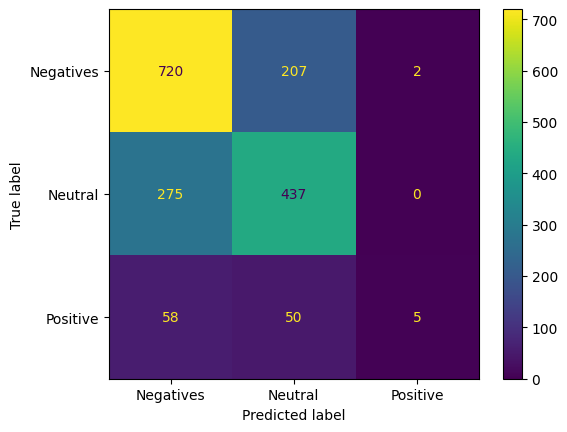

In [160]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
print(cm_dsp.plot())

In [161]:
%%time

#predicting 
y_pred = svm_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = svm_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6625

Accuracy: 0.6625
F1-score: 0.6425
CPU times and Wall time: 
CPU times: user 4.5 s, sys: 15.8 ms, total: 4.52 s
Wall time: 4.6 s


In [162]:
# Save to file / directory
joblib_file = "models/SVM_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(svm_model, joblib_file)

['models/SVM_model_score_66.25.pkl']

## 4.2 RANDOM FOREST

In [163]:
# Creating classifier model pipeline
rf_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', RandomForestClassifier()),
 ])

In [164]:
# Model training X_train, X_test, y_train, y_test
rf_model = rf_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
rf_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [165]:
#Model prediction and class generation
y_pred = rf_model.predict(X_test.values.astype('U'))
rf_model.classes_

array([-1,  0,  1])

In [166]:
#Creating and printing Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
print(cm)

[[674 252   3]
 [257 454   1]
 [ 65  43   5]]


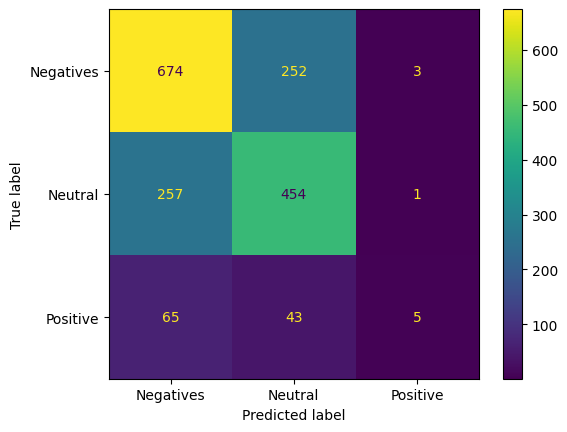

In [167]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [168]:
%%time

#predicting 
y_pred = rf_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = rf_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6460

Accuracy: 0.6460
F1-score: 0.6285
CPU times and Wall time: 
CPU times: user 532 ms, sys: 2.02 ms, total: 534 ms
Wall time: 538 ms


In [169]:
# Save to file / directory
joblib_file = "models/Randomforest_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(rf_model, joblib_file)

['models/Randomforest_model_score_64.6.pkl']

# 4.3 DECISION TREE CLASSIFIER

In [170]:
# Creating classifier model pipeline
dt_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', DecisionTreeClassifier()),
 ])

In [171]:
# Algorithm training X_train, X_test, y_train, y_test
dt_model = dt_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
dt_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])

In [172]:
#Model prediction and class generation
y_pred = dt_model.predict(X_test.values.astype('U'))
dt_model.classes_

array([-1,  0,  1])

In [173]:
#Creating and printing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
print(cm)

[[543 357  29]
 [307 376  29]
 [ 50  51  12]]


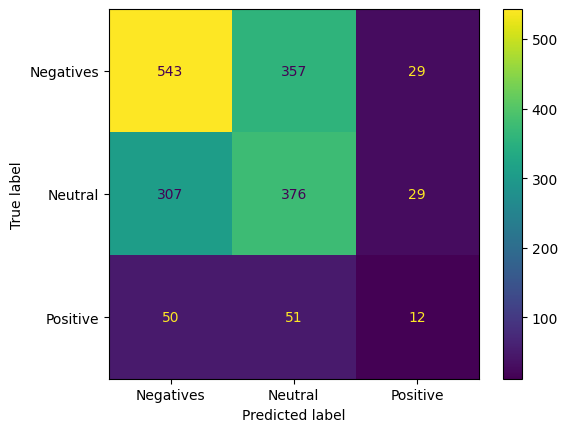

In [174]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [175]:
%%time

#predicting 
y_pred = dt_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = dt_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.5308

Accuracy: 0.5308
F1-score: 0.5270
CPU times and Wall time: 
CPU times: user 140 ms, sys: 15 µs, total: 140 ms
Wall time: 140 ms


In [176]:
# Save to file / directory
joblib_file = "models/DecisionTreeClassifier_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(dt_model, joblib_file)

['models/DecisionTreeClassifier_model_score_53.08.pkl']

# 4.4 KNEIGHBORS CLASSIFIER

In [177]:
# creating classifier modell pipeline
kn_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', KNeighborsClassifier()), 
 ])

In [178]:
# Algorithm training X_train, X_test, y_train, y_test
kn_model = kn_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
kn_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])

In [179]:
#Model prediction and class generation
y_pred = kn_model.predict(X_test.values.astype('U'))
kn_model.classes_

array([-1,  0,  1])

In [180]:
#creating and printing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=kn_model.classes_)
print(cm)

[[574 353   2]
 [208 504   0]
 [ 49  62   2]]


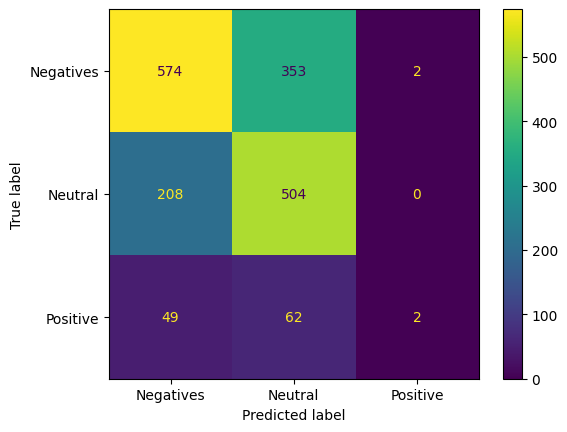

In [181]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [182]:
%%time

#predicting 
y_pred = kn_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = kn_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6157

Accuracy: 0.6157
F1-score: 0.5986
CPU times and Wall time: 
CPU times: user 18.6 s, sys: 23.1 ms, total: 18.6 s
Wall time: 10 s


In [183]:
# Save to file / directory
joblib_file = "models/KNeighborsClassifier_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(kn_model, joblib_file)

['models/KNeighborsClassifier_model_score_61.57.pkl']

# 4.5 LOGISTIC REGRESSION 

In [184]:
# Creating classifier modell pipeline
lr_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression()), 
 ])

In [185]:
# Algorithm training X_train, X_test, y_train, y_test
lr_model = lr_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
lr_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', LogisticRegression())])

In [186]:
#Model prediction and class generation
y_pred = lr_model.predict(X_test.values.astype('U'))
lr_model.classes_

array([-1,  0,  1])

In [187]:
#Creating and printing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
print(cm)

[[746 183   0]
 [288 424   0]
 [ 66  46   1]]


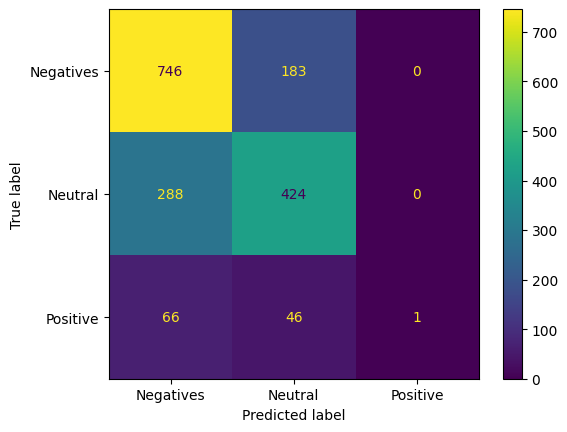

In [188]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [189]:
%%time

#model predicting 
y_pred = lr_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = lr_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6676

Accuracy: 0.6676
F1-score: 0.6428
CPU times and Wall time: 
CPU times: user 139 ms, sys: 1.01 ms, total: 140 ms
Wall time: 143 ms


In [190]:
# Save to file / directory
joblib_file = "models/Logistic regression_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(kn_model, joblib_file)

['models/Logistic regression_model_score_66.76.pkl']

# 4.6 GRADIENT BOOSTING CLASSIFIER

In [191]:
# Creating classifier model pipeline
gd_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', GradientBoostingClassifier()), 
 ])

In [192]:
# Algorithm training X_train, X_test, y_train, y_test
gd_model = gd_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
gd_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', GradientBoostingClassifier())])

In [193]:
#Model prediction and class generation
y_pred = gd_model.predict(X_test.values.astype('U'))
gd_model.classes_

array([-1,  0,  1])

In [194]:
#Creating and printing Confusion matrix  
cm = confusion_matrix(y_test, y_pred, labels=gd_model.classes_)
print(cm)

[[712 212   5]
 [332 375   5]
 [ 72  34   7]]


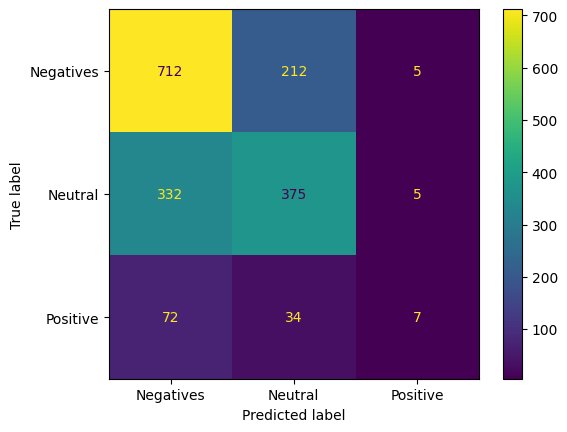

In [195]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [196]:
%%time

#predicting 
y_pred = gd_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = gd_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6237

Accuracy: 0.6237
F1-score: 0.6041
CPU times and Wall time: 
CPU times: user 248 ms, sys: 1.93 ms, total: 250 ms
Wall time: 259 ms


In [197]:
# Save to file / directory
joblib_file = "models/GradientBoostingClassifier_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(gd_model, joblib_file)

['models/GradientBoostingClassifier_model_score_62.37.pkl']

# 4.7 MULTINOMIALNB

In [198]:
#Creating classifier model pipeline
mnb_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()), 
 ])

In [199]:
# Algorithm training X_train, X_test, y_train, y_test
mnb_model = mnb_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
mnb_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [200]:
#Model predition and class generation
y_pred = mnb_model.predict(X_test.values.astype('U'))
mnb_model.classes_

array([-1,  0,  1])

In [201]:
#creating and printing confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=mnb_model.classes_)
print(cm)

[[838  91   0]
 [432 280   0]
 [ 91  22   0]]


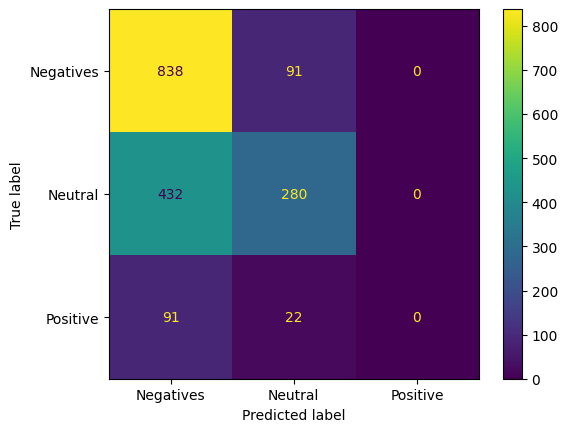

In [202]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [203]:
%%time

#predicting 
y_pred = mnb_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = mnb_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6374

Accuracy: 0.6374
F1-score: 0.5934
CPU times and Wall time: 
CPU times: user 140 ms, sys: 1 ms, total: 141 ms
Wall time: 141 ms


In [204]:
# Save to file / directory
joblib_file = "models/MultinomialNB_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(mnb_model, joblib_file)

['models/MultinomialNB_model_score_63.74.pkl']

# 4.8 XGBoost classifier

In [205]:
#creating model classifier pipeline
xgb_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', xgb.XGBClassifier(learning_rate=0.001,
                            max_depth = 1, 
                           n_estimators = 100,)),
 ])

In [206]:
#Assign values to xg labels 
Xg_train = X_train.values.astype('U')
Xg_test = X_test.values.astype('U')
yg_train = y_train
yg_test= y_test

In [207]:
#Performing label encoding process
le = LabelEncoder()
yg_train = le.fit_transform(yg_train)

In [208]:
#Training a model
xgbmodel = xgb_pipeline.fit(Xg_train, yg_train)

In [209]:
#Model prediction and generating classes 
yg_pred = xgbmodel.predict(Xg_test)
xgbmodel.classes_

array([0, 1, 2])

In [210]:
#Creating Confusion Matrix
cm = confusion_matrix(yg_test, yg_pred, labels=xgbmodel.classes_)
print(cm)


[[661  51   0]
 [106   6   1]
 [  0   0   0]]


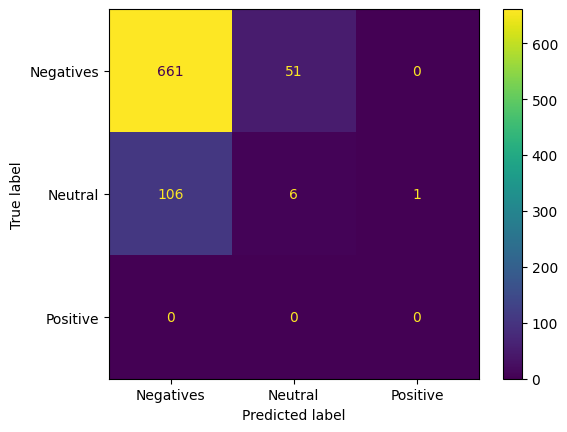

In [211]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()
plt.show()

In [212]:
%%time

#predicting 
y_pred = xgbmodel.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = xgbmodel.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.3803

Accuracy: 0.3803
F1-score: 0.2299
CPU times and Wall time: 
CPU times: user 336 ms, sys: 3.96 ms, total: 340 ms
Wall time: 321 ms


In [214]:
# Save to file / directory
joblib_file = "models/XGB_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(xgbmodel, joblib_file)

['models/XGB_model_score_38.03.pkl']

# 4.9 LightGBM classifier

In [215]:
#creating Model Classifier pipeline
lgbm_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', LGBMClassifier()),  
     ])

In [216]:
# Algorithm training X_train, X_test, y_train, y_test
lgbm_model = lgbm_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
lgbm_model

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf', LGBMClassifier())])

In [217]:
# Model prediction using test data
y_pred = lgbm_model.predict(X_test.values.astype('U'))
lgbm_model.classes_

array([-1,  0,  1])

In [218]:
# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=lgbm_model.classes_)
print(cm)

[[642 272  15]
 [251 455   6]
 [ 56  51   6]]


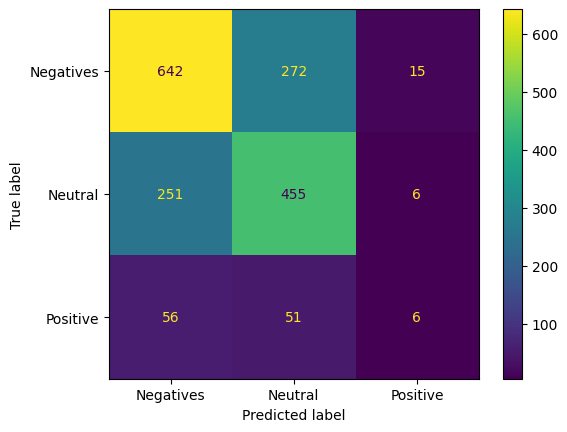

In [219]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [220]:
%%time

#predicting 
y_pred = lgbm_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = lgbm_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6288

Accuracy: 0.6288
F1-score: 0.6156
CPU times and Wall time: 
CPU times: user 317 ms, sys: 0 ns, total: 317 ms
Wall time: 237 ms


In [221]:
# Save to file / directory
joblib_file = "models/LGBMClassifier_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(lgbm_model, joblib_file)

['models/LGBMClassifier_model_score_62.88.pkl']

# 4.10 CatBoost classifier

In [222]:
#creating a model classifier pipeline 
ctb_pipeline = Pipeline([
     ('vect', CountVectorizer(ngram_range=(1,2))),
     ('tfidf', TfidfTransformer()),
     ('clf', CatBoostClassifier()), 
 ])

In [223]:
# Algorithm training X_train, X_test, y_train, y_test
ctb_model = ctb_pipeline.fit(X_train.values.astype('U'), y_train.values.astype('int64'))
ctb_model

Learning rate set to 0.087391
0:	learn: 1.0672837	total: 1.16s	remaining: 19m 19s
1:	learn: 1.0403657	total: 1.78s	remaining: 14m 48s
2:	learn: 1.0184771	total: 2.4s	remaining: 13m 16s
3:	learn: 0.9989683	total: 3.04s	remaining: 12m 36s
4:	learn: 0.9820461	total: 3.65s	remaining: 12m 5s
5:	learn: 0.9674065	total: 4.59s	remaining: 12m 40s
6:	learn: 0.9539904	total: 5.68s	remaining: 13m 25s
7:	learn: 0.9427619	total: 6.66s	remaining: 13m 45s
8:	learn: 0.9326669	total: 7.34s	remaining: 13m 28s
9:	learn: 0.9228225	total: 7.98s	remaining: 13m 9s
10:	learn: 0.9150751	total: 8.59s	remaining: 12m 52s
11:	learn: 0.9078543	total: 9.24s	remaining: 12m 40s
12:	learn: 0.9008156	total: 9.85s	remaining: 12m 28s
13:	learn: 0.8947563	total: 10.5s	remaining: 12m 17s
14:	learn: 0.8893723	total: 11.1s	remaining: 12m 8s
15:	learn: 0.8845770	total: 11.7s	remaining: 12m 1s
16:	learn: 0.8798974	total: 12.4s	remaining: 11m 54s
17:	learn: 0.8759625	total: 13s	remaining: 11m 48s
18:	learn: 0.8715805	total: 13.6s

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7f32f3044ac0>)])

In [224]:
#predicting and generating classes
y_pred = ctb_model.predict(X_test.values.astype('U'))
ctb_model.classes_

array([-1,  0,  1])

In [225]:
#printing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=ctb_model.classes_)
print(cm)

[[639 289   1]
 [251 460   1]
 [ 59  50   4]]


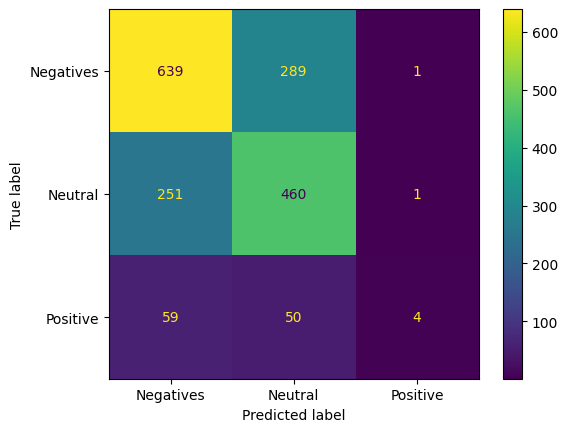

In [226]:
# Visualization of the confusion matrix
cm_dsp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatives', 'Neutral', 'Positive'])
cm_dsp.plot()

In [227]:
%%time

#predicting 
y_pred = ctb_model.predict(X_test.values.astype('U'))

# Generating a model performance scores
model_score = ctb_model.score(X_test.values.astype('U'), y_test.values.astype('int64'))
print(f'Model Score: {model_score:.4f}')
#Accurracy acore
accuracy = accuracy_score(y_test, y_pred)
print()
print(f"Accuracy: {accuracy:.4f}")
#F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")
#CPU and wall time
print("CPU times and Wall time: ")

Model Score: 0.6288

Accuracy: 0.6288
F1-score: 0.6119
CPU times and Wall time: 
CPU times: user 654 ms, sys: 33.9 ms, total: 688 ms
Wall time: 704 ms


In [228]:
# Save to file / directory
joblib_file = "models/CatBoostClassifier_model_score_"+ str(round(accuracy*100,2))+".pkl"
joblib.dump(ctb_model, joblib_file)

['models/CatBoostClassifier_model_score_62.88.pkl']